## create dataframe

In [1]:
from PIL import Image
import os

In [2]:
img = Image.open('/home/yagor/Рабочий стол/biometric hands gen hack/palm_1024/00_1egYX0UK6aHdn36tyVQAn9VIHK_pv8Rmpaug3y55zrMct4UFLnbOJYZuW9WpiBaI9Rd_a-waL5AiTewYyaQnkqk.jpg')

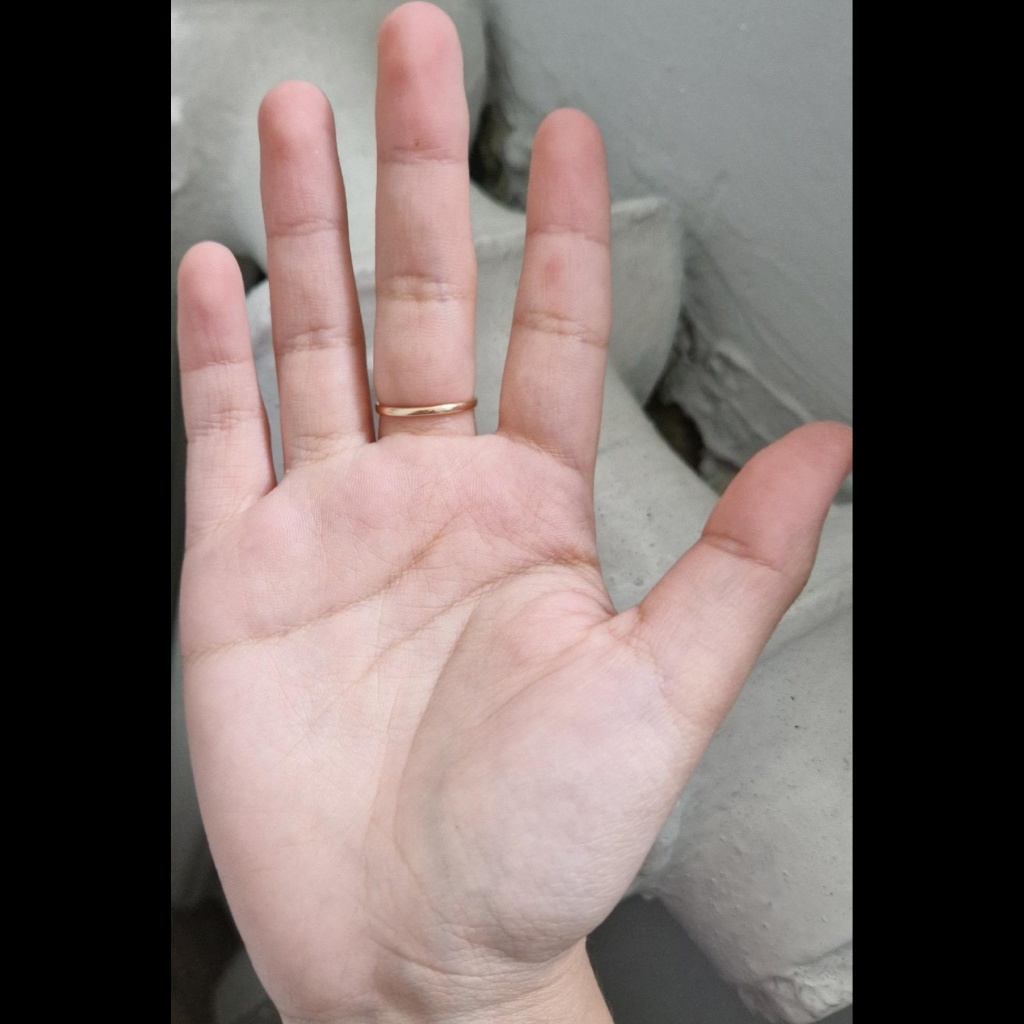

In [3]:
img

In [4]:
dir_path = 'palm_dream'
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

In [5]:
for i in range(-30, 30, 10):
    im_rotate = img.rotate(i)
    im_rotate.save(os.path.join(dir_path, str(i)+'.jpg'))

In [6]:
ls

 dataset/
 ddpm_ema_512/
 ddpm_ema_palm_512/
 ddpm_ema_palm_512.zip
 diffusers/
 dreambooth_train.ipynb
 drop_background.ipynb
 gen_data_sd-palm-fingers_full_white_back_only_plus10000+lorat3scale/
 gen_data_sd-palm-fingers_full_white_back_only_plus10000+loratsed_withgen/
 gen_data_sd-palm-model_new_fingers_full_white_back_gs_9/
 HandInfo_cleaned_and_text.csv
 HandInfo_cleaned.csv
 HandInfo.csv
 HandInfo.txt
 Hands/
 Hands.zip
 load_data.ipynb
 male-palm11.png
 male-palm9.png
 metadata_disc.csv
 palm_1024/
 palm_1024.zip
 palm_dream/
 pytorch_fid/
 result/
'result (1)'/
'result (1).zip'
'result (2)'/
 result.zip
 train_text2image_sdxl.ipynb
 train_text_to_image.ipynb
 uncond-image-generation-ldm/
'Untitled (4).ipynb'
 Копия_блокнота__vqvae_training_ipynb_.ipynb


## train db

In [7]:
cd diffusers

/home/yagor/Рабочий стол/biometric hands gen hack/diffusers


In [8]:
cd examples/dreambooth

/home/yagor/Рабочий стол/biometric hands gen hack/diffusers/examples/dreambooth


In [ ]:
from accelerate.utils import write_basic_config

write_basic_config()

Configuration already exists at /home/yagor/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


False

In [ ]:
#   --with_prior_preservation \
#   --prior_loss_weight=1.0 \
#   --class_data_dir="/home/yagor/Рабочий стол/biometric hands gen hack/gen_data_sd-palm-fingers_full_white_back_only_plus10000+loratsed_withgen" \
#   --class_prompt="realystic photo palm with fingers"\

In [17]:
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path="/home/yagor/Рабочий стол/biometric hands gen hack/diffusers/examples/text_to_image/fingers_full_white_back_only_plus10000"  \
  --instance_data_dir="/home/yagor/Рабочий стол/biometric hands gen hack/diffusers/examples/dreambooth/palm_dream" \
  --output_dir="path_to_saved_model" \
  --instance_prompt="realystic photo sksx palm with fingers" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=2e-6 \
  --train_text_encoder \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=1200 \
  --checkpointing_steps=600\
  --validation_prompt="realystic photo sksx palm with fingers"\
  --num_validation_images=4\
  --validation_steps=200

/home/yagor/anaconda3/envs/torch/lib/python3.9/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/home/yagor/anaconda3/envs/torch/lib/python3.9/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")
10/13/2024 00:45:29 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can y

In [11]:
from diffusers import DiffusionPipeline, UNet2DConditionModel
from transformers import CLIPTextModel
import torch

unet = UNet2DConditionModel.from_pretrained("path_to_saved_model/checkpoint-1200/unet")

# if you have trained with `--args.train_text_encoder` make sure to also load the text encoder
# text_encoder = CLIPTextModel.from_pretrained("path/to/model/checkpoint-100/checkpoint-100/text_encoder")

pipeline = DiffusionPipeline.from_pretrained(
    "/home/yagor/Рабочий стол/biometric hands gen hack/diffusers/examples/text_to_image/fingers_full_white_back_only_plus10000", unet=unet, safety_checker = None, dtype=torch.float16, #https://github.com/Yagorka/LLAIM_rzd/invitations
).to("cuda")


Keyword arguments {'dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

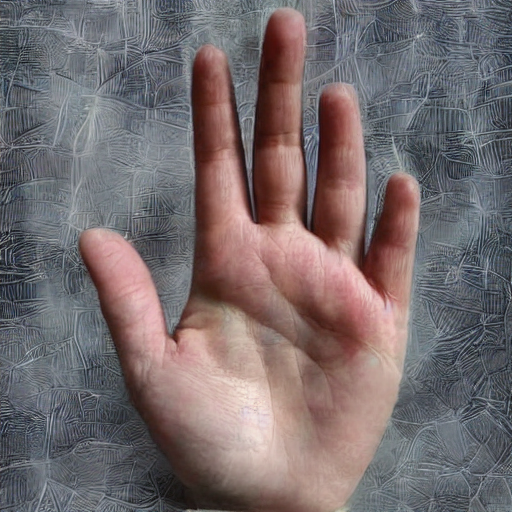

In [16]:

image = pipeline("realystic photo sksx palm with fingers", num_inference_steps=50, guidance_scale=7.5).images[0]
image